In [ ]:
import numpy as np
import time
import pandas as pd

## Breadth First Search 

In [ ]:
import numpy as np
import copy

#Take input node from user
def take_input():
  print("Enter a start node row wise (e.g 1 2 3 0 4 5 8 6 7)")
  # A= [int(i) for i in input().split()]
  A = [1, 2, 3, 0, 4, 5, 8, 6, 7]
  return A

# Find Blank tile in the node
def BlankTileLocation(N):
  for i in range(9):
    if N[i]==0:
      return i   # Return Blank Tile Location

# Move up tile
def ActionMoveUp(b,N):
  U = copy.deepcopy(N)
  if b>2:
    U[b]=U[b-3]  # Swap Tiles
    U[b-3]=0
  return U       # Return New Node

# Move down tile
def ActionMoveDown(b,N):
  D = copy.deepcopy(N)
  if b<6:
    D[b]=D[b+3]  # Swap Tiles
    D[b+3]=0
  return D       # Return New Node
   
# Move left tile
def ActionMoveLeft(b,N):
  L = copy.deepcopy(N)
  if b!=0 and b!=3 and b!=6:
    L[b]=L[b-1]  # Swap Tiles
    L[b-1]=0
  return L       # Return New Node

# Move right tile
def ActionMoveRight(b,N):
  R = copy.deepcopy(N)
  if b!=2 and b!=5 and b!=8:
    R[b]=R[b+1]  # Swap Tiles
    R[b+1]=0
  return R       # Return New Node

# Generate path from action set generated by BFS
def generate_path(path,N):
  file = open("nodePath.txt", "w")      # open text file
  file.writelines(column(N)+ '\n')      # write path
  print(column(N))
  for p in range(len(path)):            # Check the action sets
    if path[p]=="U":                   
      b=BlankTileLocation(N)
      N=ActionMoveUp(b,N)
      file.writelines(column(N)+ '\n')
      print(column(N))
    elif path[p]=="D":
      b=BlankTileLocation(N)
      N=ActionMoveDown(b,N)
      file.writelines(column(N)+ '\n')
      print(column(N))
    elif path[p]=="L":
      b=BlankTileLocation(N)
      N=ActionMoveLeft(b,N)
      file.writelines(column(N)+ '\n')
      print(column(N))
    elif path[p]=="R":
      b=BlankTileLocation(N)
      N=ActionMoveRight(b,N)
      file.writelines(column(N)+ '\n')
      print(column(N))
  file.close()                           # Close File

# Add Node to Child list and find no of childs per parent
def AddNode(P,Pf,iteration,child,j):
  Pdir=Pf[9:len(Pf)]
  c=0
  b=BlankTileLocation(P)
  A=ActionMoveUp(b,P)
  B=ActionMoveDown(b,P)
  C=ActionMoveLeft(b,P)
  D=ActionMoveRight(b,P)             
  if P!=A:                             # Check if node is new or same
    child=child+A+Pdir                 # Append new node and its action set
    child.append("U")
    c=c+1
  if P!=B:
    child=child+B+Pdir
    child.append("D")
    c=c+1
  if P!=C:
    child=child+C+Pdir
    child.append("L")
    c=c+1
  if P!=D:
    child=child+D+Pdir
    child.append("R")
    c=c+1
  return c+j, child,c                 #Return total child nodes, nodes, nodes per parent

# convert node to column wise
def column(N):
  F=copy.deepcopy(N)
  F=str(N[0])+" "+str(N[3])+" "+str(N[6])+" "+str(N[1])+" "+str(N[4])+" "+str(N[7])+" "+str(N[2])+" "+str(N[5])+" "+str(N[8])
  return F                           # Return node column wise

# BFS algorithm to reach goal node
def run(N):
  inv=0
  for i in range(8):               # Check Solvability
    for j in range(i,9):
      if N[i]>N[j] and N[j]!=0:
        inv=inv+1
  if inv%2!=0:                     # Exit if not solvable
    print("No solution exists for this initial state")
    return [0],[0],0,0
  else:
    print(" solution exists for this initial state",'\n',"Maximum time required to solve can be 1hr 30mins",'\n',"Solving...")
  file2 = open("Nodes.txt", "w")
  explored=[]                      # Intialize variables
  Parent= N
  child=[]
  cn=[]
  no_of_parents=1
  no_of_childs=0
  v=0
  iteration=0
  f=0
  while f==0:                      # Access different tree levels
    child.clear()
    for c in range(no_of_parents): # Access different node in a particular level
      Pf=Parent[(0+c*(9+iteration)):(iteration+9+c*(9+iteration))]
      P=Pf[0:9]
      if P==[1,2,3,4,5,6,7,8,0]:
        f=1
        explored.append(P)
        file2.writelines(column(P)+ '\n')
        break
      if not P in explored:        # Check for child node if parent not in explored
        no_of_childs,child,v=AddNode(P,Pf,iteration,child,no_of_childs)
        cn.append(v)
        explored.append(P)
        file2.writelines(column(P)+ '\n')    # Write to explored nodes list txt
      else:
        cn.append(0)
    iteration+=1
    no_of_parents=int(len(child)/(9+iteration))
    Parent=copy.deepcopy(child)
    print(" Explored Nodes",len(explored))
  file2.close()
  print(cn)
  print(Pf[9:len(Pf)])
  return Pf[9:len(Pf)],cn,len(explored),1   # Return final actionset, no of nodes per parent, total no of explored nodes and 1
 
# Generate NodeInfo.txt file from no of childs per parents data
def generate_nodeinfo(o,f):
  file1 = open("NodesInfo.txt", "w")   # Open File
  u=0
  j=0
  temp=1
  file1.writelines(str(1)+" "+str(0)+" "+str(0)+'\n')
  for i in range(1,f):
    if o[j]==0:
      temp=temp+1
      j=j+1
    file1.writelines(str(i+1)+" "+str(temp)+" "+str(0)+'\n')   # write child node, Parent Node and cost
    if o[j]!=0:
      u=u+1
      if o[j]-u==0 and o[j]!=0:
        j=j+1
        temp=temp+1
        u=0
  file1.close()                        # Close File

# Calling below code 50 times and calulating total time taken 
startTime = time.time()

for i in range(1):
  # Call Functions
  A=take_input()   # Taking input from user
  NP,o,x,f=run(A)  # Run the BFS Algorithm

duration = time.time() - startTime
results["Breadth First Search"] = duration

Enter a start node row wise (e.g 1 2 3 0 4 5 8 6 7)
 solution exists for this initial state 
 Maximum time required to solve can be 1hr 30mins 
 Solving...
 Explored Nodes 1
 Explored Nodes 4
 Explored Nodes 9
 Explored Nodes 19
 Explored Nodes 33
 Explored Nodes 61
 Explored Nodes 103
 Explored Nodes 183
 Explored Nodes 291
 Explored Nodes 493
 Explored Nodes 771
 Explored Nodes 1295
 Explored Nodes 2021
 Explored Nodes 3369
 Explored Nodes 5173
 Explored Nodes 8447
[3, 2, 2, 4, 0, 3, 0, 3, 3, 3, 0, 3, 4, 0, 2, 4, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 4, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 4, 0, 2, 4, 0, 2, 4, 2, 0, 4, 2, 0, 4, 4, 2, 0, 4, 2, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 0, 4, 2, 0, 4, 0, 0, 2, 4, 0,

## DFS (Brute-Force) 

In [ ]:
# Random initial state gerator

def rotateList(arr,d,n):
  rev_arr = arr[d:n]
  rev_arr.reverse()
  arr[:] =  arr[0:d] + rev_arr
  return arr


def RandomStateGerator():
  initial = [1, 2, 3, 4, 5, 0, 6, 7, 8]
  randRotate = np.random.randint(7, 9)
  initial = rotateList(initial, randRotate, len(initial))
  initial = np.array(initial)
  initial = initial.reshape(3, 3)
  return initial

In [ ]:
# Python code to display the way from the root  
# node to the final destination node for N*N-1 puzzle  
# algorithm by the help of Branch and Bound technique  
# The answer assumes that the instance of the  
# puzzle can be solved  
  
# Importing the 'copy' for deepcopy method  
import copy  
  
# Importing the heap methods from the python  
# library for the Priority Queue  
from heapq import heappush, heappop  
  
# This particular var can be changed to transform  
# the program from 8 puzzle(n=3) into 15  
# puzzle(n=4) and so on ...  
n = 3  
  
# bottom, left, top, right  
rows = [ 1, 0, -1, 0 ]  
cols = [ 0, -1, 0, 1 ]  
  
# creating a class for the Priority Queue  
class priorityQueue:  
      
    # Constructor for initializing a  
    # Priority Queue  
    def __init__(self):  
        self.heap = []  
  
    # Inserting a new key 'key'  
    def push(self, key):  
        heappush(self.heap, key)  
  
    # funct to remove the element that is minimum,  
    # from the Priority Queue  
    def pop(self):  
        return heappop(self.heap)  
  
    # funct to check if the Queue is empty or not  
    def empty(self):  
        if not self.heap:  
            return True  
        else:  
            return False  
  
# structure of the node  
class nodes:  
      
    def __init__(self, parent, mats, empty_tile_posi,  
                costs, levels):  
                      
        # This will store the parent node to the  
        # current node And helps in tracing the  
        # path when the solution is visible  
        self.parent = parent  
  
        # Useful for Storing the matrix  
        self.mats = mats  
  
        # useful for Storing the position where the  
        # empty space tile is already existing in the matrix  
        self.empty_tile_posi = empty_tile_posi  
  
        # Store no. of misplaced tiles  
        self.costs = costs  
  
        # Store no. of moves so far  
        self.levels = levels  
  
    # This func is used in order to form the  
    # priority queue based on  
    # the costs var of objects  
    def __lt__(self, nxt):  
        return self.costs < nxt.costs  
  
# method to calc. the no. of  
# misplaced tiles, that is the no. of non-blank  
# tiles not in their final posi  
def calculateCosts(mats, final) -> int:  
      
    count = 0  
    for i in range(n):  
        for j in range(n):  
            if ((mats[i][j]) and  
                (mats[i][j] != final[i][j])):  
                count += 1  
                  
    return count  
  
def newNodes(mats, empty_tile_posi, new_empty_tile_posi,  
            levels, parent, final) -> nodes:  
                  
    # Copying data from the parent matrixes to the present matrixes  
    new_mats = copy.deepcopy(mats)  
  
    # Moving the tile by 1 position  
    x1 = empty_tile_posi[0]  
    y1 = empty_tile_posi[1]  
    x2 = new_empty_tile_posi[0]  
    y2 = new_empty_tile_posi[1]  
    new_mats[x1][y1], new_mats[x2][y2] = new_mats[x2][y2], new_mats[x1][y1]  
  
    # Setting the no. of misplaced tiles  
    costs = calculateCosts(new_mats, final)  
  
    new_nodes = nodes(parent, new_mats, new_empty_tile_posi,  
                    costs, levels)  
    return new_nodes  
  
# func to print the N by N matrix  
def printMatsrix(mats):  
      
    for i in range(n):  
        for j in range(n):  
            print("%d " % (mats[i][j]), end = " ")  
              
        print()  
  
# func to know if (x, y) is a valid or invalid  
# matrix coordinates  
def isSafe(x, y):  
      
    return x >= 0 and x < n and y >= 0 and y < n  
  
# Printing the path from the root node to the final node  
def printPath(root):  
      
    if root == None:  
        return  
      
    printPath(root.parent)  
    printMatsrix(root.mats)  
    print()  
  
# method for solving N*N - 1 puzzle algo  
# by utilizing the Branch and Bound technique. empty_tile_posi is  
# the blank tile position initially.  
def solve(initial, empty_tile_posi, final):  
      
    # Creating a priority queue for storing the live  
    # nodes of the search tree  
    pq = priorityQueue()  
  
    # Creating the root node  
    costs = calculateCosts(initial, final)  
    root = nodes(None, initial,  
                empty_tile_posi, costs, 0)  
  
    # Adding root to the list of live nodes  
    pq.push(root)  
  
    # Discovering a live node with min. costs,  
    # and adding its children to the list of live  
    # nodes and finally deleting it from  
    # the list.  
    while not pq.empty():  
  
        # Finding a live node with min. estimatsed  
        # costs and deleting it form the list of the  
        # live nodes  
        minimum = pq.pop()  
  
        # If the min. is ans node  
        if minimum.costs == 0:  
              
            # Printing the path from the root to  
            # destination;  
            printPath(minimum)  
            return  
  
        # Generating all feasible children  
        for i in range(n):  
            new_tile_posi = [  
                minimum.empty_tile_posi[0] + rows[i],  
                minimum.empty_tile_posi[1] + cols[i], ]  
                  
            if isSafe(new_tile_posi[0], new_tile_posi[1]):  
                  
                # Creating a child node  
                child = newNodes(minimum.mats,  
                                minimum.empty_tile_posi,  
                                new_tile_posi,  
                                minimum.levels + 1,  
                                minimum, final,)  
  
                # Adding the child to the list of live nodes  
                pq.push(child)  
  
# Main Code  
  
# Initial configuration  
# Value 0 is taken here as an empty space  
arr = [[ [ 1, 2, 3 ],  
            [ 5, 6, 0 ],  
            [ 7, 8, 4 ] ],
       [ [ 0, 2, 3 ],  
            [ 1, 8, 6 ],  
            [ 5, 7, 4 ] ],
       [ [ 1, 2, 3 ],  
            [ 8, 0, 6 ],  
            [ 5, 7, 4 ] ],
       [ [ 1, 3, 0 ],  
            [ 5, 2, 6 ],  
            [ 7, 8, 4 ] ]
       ]
randIndex = np.random.randint(0, 4)
initial = arr[0]

print(randIndex, initial)
  
# Final configuration that can be solved  
# Value 0 is taken as an empty space  
final = [ [ 1, 2, 3 ],  
        [ 5, 8, 6 ],  
        [ 0, 7, 4 ] ]  
  
# Blank tile coordinates in the   
# initial configuration  
empty_tile_posi = [ 1, 2 ]  
  
# Calling below code 50 times and calulating total time taken 
startTime = time.time()

for i in range(50):
  # Method call for solving the puzzle  
  solve(initial, empty_tile_posi, final)  

duration = time.time() - startTime
results["DFS (Brute-Force) "] = duration/50

0 [[1, 2, 3], [5, 6, 0], [7, 8, 4]]
1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  

1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  

## A* Algorithm

In [ ]:
class Node:
    def __init__(self, data, level, fval):
        # Initialize the node with the data ,level of the node and the calculated fvalue
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        # Generate hild nodes from the given node by moving the blank space
        # either in the four direction {up,down,left,right}
        x, y = self.find(self.data, '_')
        # val_list contains position values for moving the blank space in either of
        # the 4 direction [up,down,left,right] respectively.
        val_list = [[x, y - 1], [x, y + 1], [x - 1, y], [x + 1, y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0)
                children.append(child_node)
        return children

    def shuffle(self, puz, x1, y1, x2, y2):
        # Move the blank space in the given direction and if the position value are out
        # of limits the return None
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def copy(self, root):
        # copy function to create a similar matrix of the given node
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self, puz, x):
        # Specifically used to find the position of the blank space
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data)):
                if puz[i][j] == x:
                    return i, j


class Puzzle:
    def __init__(self, size):
        # Initialize the puzzle size by the the specified size,open and closed lists to empty
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        # Accepts the puzzle from the user
        puz = []
        for i in range(0, self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        # Heuristic function to calculate Heuristic value f(x) = h(x) + g(x)
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        # Calculates the difference between the given puzzles
        temp = 0
        for i in range(0, self.n):
            for j in range(0, self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp

    def process(self):
        # Accept Start and Goal Puzzle state
        # print("enter the start state matrix \n")
        # start = self.accept()

        randIndex = np.random.randint(0, 4)

        startArr = [[ [ '1', '2', '3' ],  
                    [ '5', '6', '_' ],  
                    [ '7', '8', '4' ]], 
              [ [ '_', '2', '3' ],  
                    [ '1', '8', '6' ],  
                    [ '5', '7', '4' ] ],
              [ [ '1', '2', '3' ],  
                    [ '8', '_', '6' ],  
                    [ '5', '7', '4' ] ],
              [ [ '1', '3', '_' ],  
                    [ '5', '2', '6' ],  
                    [ '7', '8', '4' ] ]
              ]
        start = startArr[randIndex]
        start
        # print("enter the goal state matrix \n")
        # goal = self.accept()
        goal =  [[ '1', '2', '3' ],  
        [ '5', '8', '6' ],  
        [ '_', '7', '4' ] ] 

        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        # put the start node in the open list
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("==================================================\n")
            for i in cur.data:
                for j in i:
                    print(j, end=" ")
                print("")
            # if the difference between current and goal node is 0 we have reached the goal node
            if (self.h(cur.data, goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i, goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]
            # sort the open list based on f value
            self.open.sort(key=lambda x: x.fval, reverse=False)



# Calling below code 50 times and calulating total time taken 
startTime = time.time()

for i in range(50):
  puz = Puzzle(3)
  puz.process()

duration = time.time() - startTime
results["A* Algorithm"] = duration/50





1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 3 _ 
5 2 6 
7 8 4 

1 _ 3 
5 2 6 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 3 _ 
5 2 6 
7 8 4 

1 _ 3 
5 2 6 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




1 3 _ 
5 2 6 
7 8 4 

1 _ 3 
5 2 6 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 

1 2 3 
5 8 6 
_ 7 4 




_ 2 3 
1 8 6 
5 7 4 

1 2 3 
_ 8 6 
5 7 4 

1 2 3 
5 8 6 
_ 7 4 




_ 2 3 
1 8 6 
5 7 4 

1 2 3 
_ 8 6 
5 7 4 

1 2 3 
5 8 6 
_ 7 4 




1 2 3 
8 _ 6 
5 7 4 

1 2 3 
_ 8 6 
5 7 4 

1 2 3 
5 8 6 
_ 7 4 




1 2 3 
8 _ 6 
5 7 4 

1 2 3 
_ 8 6 
5 7 4 

1 2 3 
5 8 6 
_ 7 4 




_ 2 3 
1 8 6 
5 7

In [ ]:
results

{'Breadth First Search': 13.391476154327393,
 'DFS (Brute-Force) ': 0.020274434089660644,
 'A* Algorithm': 0.020711245536804198}

In [ ]:
results_df = pd.DataFrame(results, index=[0])

In [ ]:
results_df

,Breadth First Search,DFS (Brute-Force),A* Algorithm
0,13.391476,0.020274,0.020711


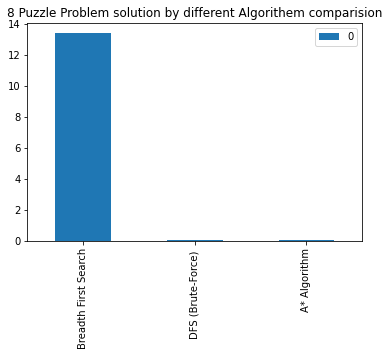

In [ ]:
results_df.T.plot(kind='bar',
                  title="8 Puzzle Problem solution by different Algorithem comparision");

In [ ]:
# Most efficient algorithem 
timer = 9999
bestAlgo = ""
for Algorithem, timeTaken in results.items():
  if timer > timeTaken:
    timer = timeTaken
    bestAlgo = Algorithem 

In [ ]:
print(f"Best Algorithem for solving 8 puzzel problem (in this case) is '{bestAlgo}' and it duration is :- {timer}")

Best Algorithem for solving 8 puzzel problem (in this case) is 'DFS (Brute-Force) ' and it duration is :- 0.020274434089660644


Calculating best Algorithem without BFS 

In [ ]:
del results["Breadth First Search"]

In [ ]:
results

{'DFS (Brute-Force) ': 0.020274434089660644,
 'A* Algorithm': 0.020711245536804198}

In [ ]:
results_df = pd.DataFrame(results, index=[0])

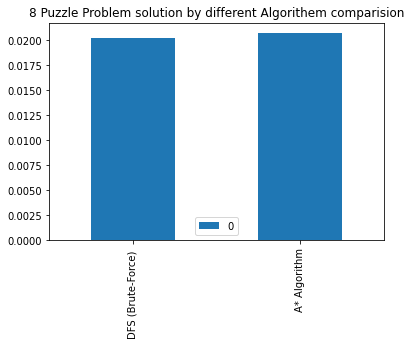

In [ ]:
results_df.T.plot(kind='bar',
                  title="8 Puzzle Problem solution by different Algorithem comparision");